<a href="https://colab.research.google.com/github/swayangshreesamal/volatility-risk-forecasting/blob/main/04_regime_aware_volatility_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regime-Aware Volatility Forecasting

This notebook builds a simple volatility forecast
by combining baseline rolling volatility with
ML-predicted market risk regimes.


In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Mounted at /content/drive


### Load Processed Data

We load the processed dataset containing
volatility features and predicted risk regimes
from previous notebooks.


In [ ]:
df =pd.read_csv(
    "/content/drive/My Drive/volatility-risk-forecasting/DATA/PROCESSED/volatility_ml_output.csv",
    parse_dates=["Date"],
    index_col="Date"
)
df.head()

,Close,High,Low,Open,Volume,log_return,volatility_14d,vol_7d,vol_14d,vol_30d,vol_annualized,vol_7d_annualized,vol_14d_annualized,vol_30d_annualized,return_14d,risk_rgime,vol_regime,target_vol,predicted_risk_regime
Date,,,,,,,,,,,,,,,,,,,
2007-11-19,5907.649902,5981.799805,5893.799805,5908.049805,0,0.000135,0.014979,0.019599,0.014979,0.022943,0.20537,0.311124,0.237786,0.364201,NaN,Medium Risk,NaN,0.016008,NaN
2007-11-20,5780.899902,5923.700195,5755.799805,5911.250000,0,-0.021689,0.016008,0.020814,0.016008,0.023020,0.20537,0.330417,0.254115,0.365432,NaN,Medium Risk,NaN,0.018750,NaN
2007-11-21,5561.049805,5790.049805,5530.850098,5778.799805,0,-0.038772,0.018750,0.025526,0.018750,0.022889,0.20537,0.405207,0.297650,0.363356,NaN,Medium Risk,NaN,0.018767,NaN
2007-11-22,5519.350098,5608.649902,5394.350098,5564.649902,0,-0.007527,0.018767,0.024657,0.018767,0.022633,0.20537,0.391423,0.297915,0.359286,NaN,Medium Risk,NaN,0.019118,NaN
2007-11-23,5608.600098,5638.600098,5514.750000,5524.299805,0,0.016041,0.019118,0.017523,0.019118,0.022652,0.20537,0.278175,0.303492,0.359590,NaN,Medium Risk,NaN,0.020021,NaN


In [ ]:
df['future_vol_14d']=df['vol_14d'].shift(-14)
df =df.dropna()

df[['vol_14d','future_vol_14d']].head()


,vol_14d,future_vol_14d
Date,,
2007-12-06,0.017574,0.018834
2007-12-07,0.017588,0.018957
2007-12-10,0.016405,0.018921
2007-12-11,0.012312,0.018029
2007-12-12,0.011642,0.017835


### Baseline Volatility Forecast

A simple baseline forecast is created by shifting
14-day volatility forward. This represents a
naive volatility expectation.


In [ ]:
df['baseline_forecast'] = df['vol_14d']


/tmp/ipython-input-801234855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['baseline_forecast'] = df['vol_14d']


### Regime Adjustment Logic

Volatility forecasts are adjusted using
risk regime signals to reflect changing
market conditions.


In [ ]:
regime_vol_map = (
    df.groupby('predicted_risk_regime')['future_vol_14d']
      .mean()
)

regime_vol_map


,future_vol_14d
predicted_risk_regime,
0.002747,0.004925
0.002832,0.005120
0.003003,0.007456
0.003020,0.005334
0.003077,0.005222
...,...
0.059935,0.042029
0.060664,0.032920
0.060715,0.035780


### Forecast Comparison

We compare baseline volatility with
regime-aware volatility to observe
the impact of regime signals.


In [ ]:
df['regime_forecast'] = df['predicted_risk_regime'].map(regime_vol_map)

df[['baseline_forecast', 'regime_forecast', 'future_vol_14d']].head()


/tmp/ipython-input-1205248466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['regime_forecast'] = df['predicted_risk_regime'].map(regime_vol_map)


,baseline_forecast,regime_forecast,future_vol_14d
Date,,,
2007-12-06,0.017574,0.018834,0.018834
2007-12-07,0.017588,0.018957,0.018957
2007-12-10,0.016405,0.018921,0.018921
2007-12-11,0.012312,0.018029,0.018029
2007-12-12,0.011642,0.017835,0.017835


### Regime-Aware Forecast

The baseline forecast is scaled using
regime-based adjustments, producing a
risk-aware volatility forecast.


### Visualization

This plot compares baseline and
regime-aware volatility forecasts
over time.


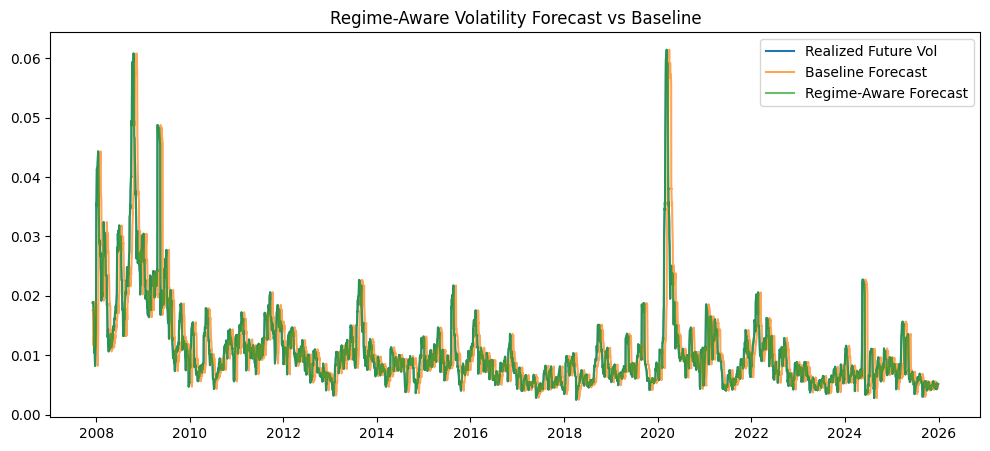

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df['future_vol_14d'], label='Realized Future Vol')
plt.plot(df.index, df['baseline_forecast'], label='Baseline Forecast', alpha=0.7)
plt.plot(df.index, df['regime_forecast'], label='Regime-Aware Forecast', alpha=0.7)
plt.legend()
plt.title("Regime-Aware Volatility Forecast vs Baseline")
plt.show()



### Save Forecast Output

The final forecast is saved for
analysis, reporting, or deployment
use cases.


In [ ]:
output_path = "/content/drive/My Drive/volatility-risk-forecasting/DATA/PROCESSED/volatility_forecasts.csv"
df.to_csv(output_path)

print("volatility_forecasts.csv saved successfully")


volatility_forecasts.csv saved successfully
